# Modeling

In [ ]:
#Importing Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading data

In [ ]:
# loading data
data=pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/data.p","rb"))

## Splitting Data into Train, Validation and Test sets

In [ ]:
X_train=data[data['date_block_num']<33].drop('item_cnt_month', axis=1)
y_train=data[data['date_block_num']<33]['item_cnt_month']
X_val=data[data['date_block_num']==33].drop('item_cnt_month', axis=1)
y_val=data[data['date_block_num']==33]['item_cnt_month']
X_test=data[data['date_block_num']==34].drop('item_cnt_month', axis=1)
y_test=data[data['date_block_num']==34]['item_cnt_month']

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(1390453, 44) (1390453,)
(31531, 44) (31531,)
(214200, 44) (214200,)


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression().fit(X_train,y_train)

y_trainpred=reg.predict(X_train).clip(0,20)
y_valpred=reg.predict(X_val).clip(0,20)
y_testpred=reg.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",np.sqrt(mean_squared_error(y_train,y_trainpred)))
print("val_rmse: ",np.sqrt(mean_squared_error(y_val,y_valpred)))

train_rmse:  0.9089800662843746
val_rmse:  0.8906959373285738


      test_rmse: 1.18



## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_trainpred=dt.predict(X_train).clip(0,20)
y_valpred=dt.predict(X_val).clip(0,20)
y_testpred=dt.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",np.sqrt(mean_squared_error(y_train,y_trainpred)))
print("val_rmse: ",np.sqrt(mean_squared_error(y_val,y_valpred)))

train_rmse:  0.0
val_rmse:  0.34009403076755784


In [ ]:
dt_model=DecisionTreeRegressor(max_depth=20,min_samples_split=10)
dt_model.fit(X_train,y_train)

y_trainpred=dt_model.predict(X_train).clip(0,20)
y_valpred=dt_model.predict(X_val).clip(0,20)
y_testpred=dt_model.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",np.sqrt(mean_squared_error(y_train,y_trainpred)))
print("val_rmse: ",np.sqrt(mean_squared_error(y_val,y_valpred)))

train_rmse:  0.1156807167413633
val_rmse:  0.3224740494340663


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

y_trainpred=rfr.predict(X_train).clip(0,20)
y_valpred=rfr.predict(X_val).clip(0,20)
y_testpred=rfr.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",np.sqrt(mean_squared_error(y_train,y_trainpred)))
print("val_rmse: ",np.sqrt(mean_squared_error(y_val,y_valpred)))

train_rmse:  0.07177234580395336
val_rmse:  0.20803383269243023


## XGBoost Regressor

In [ ]:
import xgboost as xgb

xgb_model= xgb.XGBRegressor(objective ='reg:squarederror')
xgb_model.fit(X_train,y_train)

y_trainpred=xgb_model.predict(X_train).clip(0,20)
y_valpred=xgb_model.predict(X_val).clip(0,20)
y_testpred=xgb_model.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",np.sqrt(mean_squared_error(y_train,y_trainpred)))
print("val_rmse: ",np.sqrt(mean_squared_error(y_val,y_valpred)))

train_rmse:  0.5253807786252751
val_rmse:  0.530790219623368


In [ ]:
import xgboost as xgb

xgb_model= xgb.XGBRegressor(max_depth=6,learning_rate=0.148,min_child_weight=26,reg_lambda=0.171,reg_alpha=0.170,n_jobs=-1,objective ='reg:squarederror')
xgb_model.fit(X_train,y_train)

y_trainpred=xgb_model.predict(X_train).clip(0,20)
y_valpred=xgb_model.predict(X_val).clip(0,20)
y_testpred=xgb_model.predict(X_test).clip(0,20)

In [ ]:
print("train_rmse: ",np.sqrt(mean_squared_error(y_train,y_trainpred)))
print("val_rmse: ",np.sqrt(mean_squared_error(y_val,y_valpred)))

train_rmse:  0.16885744992237273
val_rmse:  0.17725205657519655


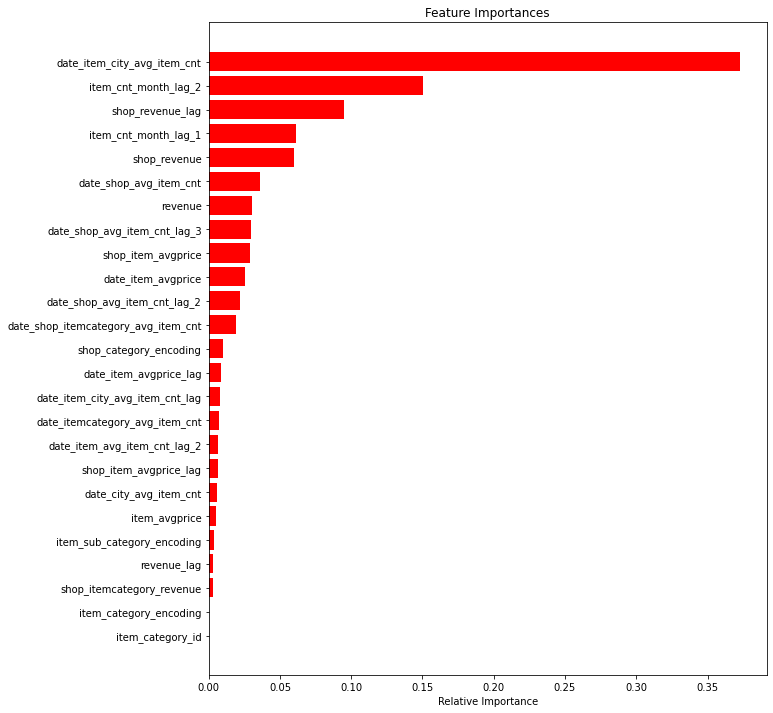

In [ ]:
features = X_train.columns
importances =xgb_model.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/test.csv")

test['item_cnt_month']=y_testpred

result=test.drop(['shop_id','item_id'],axis=1)

In [ ]:
result.to_csv("/content/drive/MyDrive/Colab Notebooks/Predict_Future_Sales/sampleresult13.csv",index=False)